**TEAM PROJECT, by Leopoldo Aguerrevere, Ian Sellers, Ryan Brown**
**Introduction**
This Jupyter notebook is designed to perform data analysis using Apache Spark in combination with MongoDB, Cassandra, and Elasticsearch. The goal is to demonstrate the setup and configuration of Spark with these data stores and explore how to integrate them in a distributed data processing pipeline.

**PySpark Setup**
 
In this section, we will initialize a PySpark session.
 
The following steps will set up the Spark session and configure connections to these data sources:
- MongoDB: For storing large-scale data in a flexible, document-based format.
- Cassandra: A distributed database designed for handling high volumes of data with a focus on availability and scalability.
- Elasticsearch: A search engine based on the Lucene library, ideal for full-text search and data analytics.
 
The code snippet below demonstrates how to configure these systems and initialize the Spark session.
 
Code Explanation
 
1. **MongoDB Configuration**:
   - `spark.mongodb.input.uri` and `spark.mongodb.output.uri`: These parameters specify the MongoDB URI that Spark will use for both reading from and writing to MongoDB.
 
2. **Cassandra Configuration**:
   - `spark.cassandra.connection.host`: Specifies the host address for Cassandra. In this case, it's running on `localhost`.
 
3. **Elasticsearch Configuration**:
   - `spark.es.nodes`: Specifies the address of the Elasticsearch node.
   - `spark.es.port`: Specifies the port number for Elasticsearch, which is typically `9200`.
 
4. **SparkSession**:
   - `SparkSession.builder`: This method is used to configure and create a SparkSession. The `master("local")` parameter indicates that Spark will run locally (on a single machine).
   - `appName('jupyter-pyspark')`: Sets the application name for the Spark job.
   - `.getOrCreate()`: Creates a new SparkSession or retrieves the existing one if it already exists.
 
This setup allows us to interact with MongoDB, Cassandra, and Elasticsearch within the PySpark framework.

In [33]:
from pyspark.sql import SparkSession

# Define the URIs and hosts
mongo_uri = "mongodb://localhost:27017/mydatabase"
cassandra_host = "localhost"
elastic_host = "localhost"
elastic_port = "9200"

# Initialize Spark Session
spark = SparkSession \
    .builder \
    .master("local") \
    .appName('jupyter-pyspark') \
    .config("spark.mongodb.input.uri", mongo_uri) \
    .config("spark.mongodb.output.uri", mongo_uri) \
    .config("spark.cassandra.connection.host", cassandra_host) \
    .config("spark.es.nodes", elastic_host) \
    .config("spark.es.port", elastic_port) \
    .config("spark.jars.packages", 
            "org.mongodb.spark:mongo-spark-connector_2.12:3.0.1,"
            "com.datastax.spark:spark-cassandra-connector-assembly_2.12:3.1.0,"
            "org.elasticsearch:elasticsearch-spark-20_2.12:7.15.0") \
    .getOrCreate()

# Set Spark context log level to ERROR
sc = spark.sparkContext
sc.setLogLevel("ERROR")


**Data Loading and Analysis**
 
In the following sections, we will load data from MongoDB, Cassandra, and Elasticsearch into Spark DataFrames. We will explore how to perform transformations and actions on this data using Spark's capabilities. Afterward, we will analyze the data, draw insights, and visualize the results.

In [27]:
source_file = spark.read.option("header", True).csv("file:///home/jovyan/datasets/data.csv")
df = source_file

df.write.format("mongo").mode("overwrite").option("database","Project").option("collection","Fires").save()
print(source_file)

DataFrame[OBJECTID: string, Shape: string, FOD_ID: string, FPA_ID: string, SOURCE_SYSTEM_TYPE: string, SOURCE_SYSTEM: string, NWCG_REPORTING_AGENCY: string, NWCG_REPORTING_UNIT_ID: string, NWCG_REPORTING_UNIT_NAME: string, SOURCE_REPORTING_UNIT: string, SOURCE_REPORTING_UNIT_NAME: string, LOCAL_FIRE_REPORT_ID: string, LOCAL_INCIDENT_ID: string, FIRE_CODE: string, FIRE_NAME: string, ICS_209_PLUS_INCIDENT_JOIN_ID: string, ICS_209_PLUS_COMPLEX_JOIN_ID: string, MTBS_ID: string, MTBS_FIRE_NAME: string, COMPLEX_NAME: string, FIRE_YEAR: string, DISCOVERY_DATE: string, DISCOVERY_DOY: string, DISCOVERY_TIME: string, NWCG_CAUSE_CLASSIFICATION: string, NWCG_GENERAL_CAUSE: string, NWCG_CAUSE_AGE_CATEGORY: string, CONT_DATE: string, CONT_DOY: string, CONT_TIME: string, FIRE_SIZE: string, FIRE_SIZE_CLASS: string, LATITUDE: string, LONGITUDE: string, OWNER_DESCR: string, STATE: string, COUNTY: string, FIPS_CODE: string, FIPS_NAME: string]


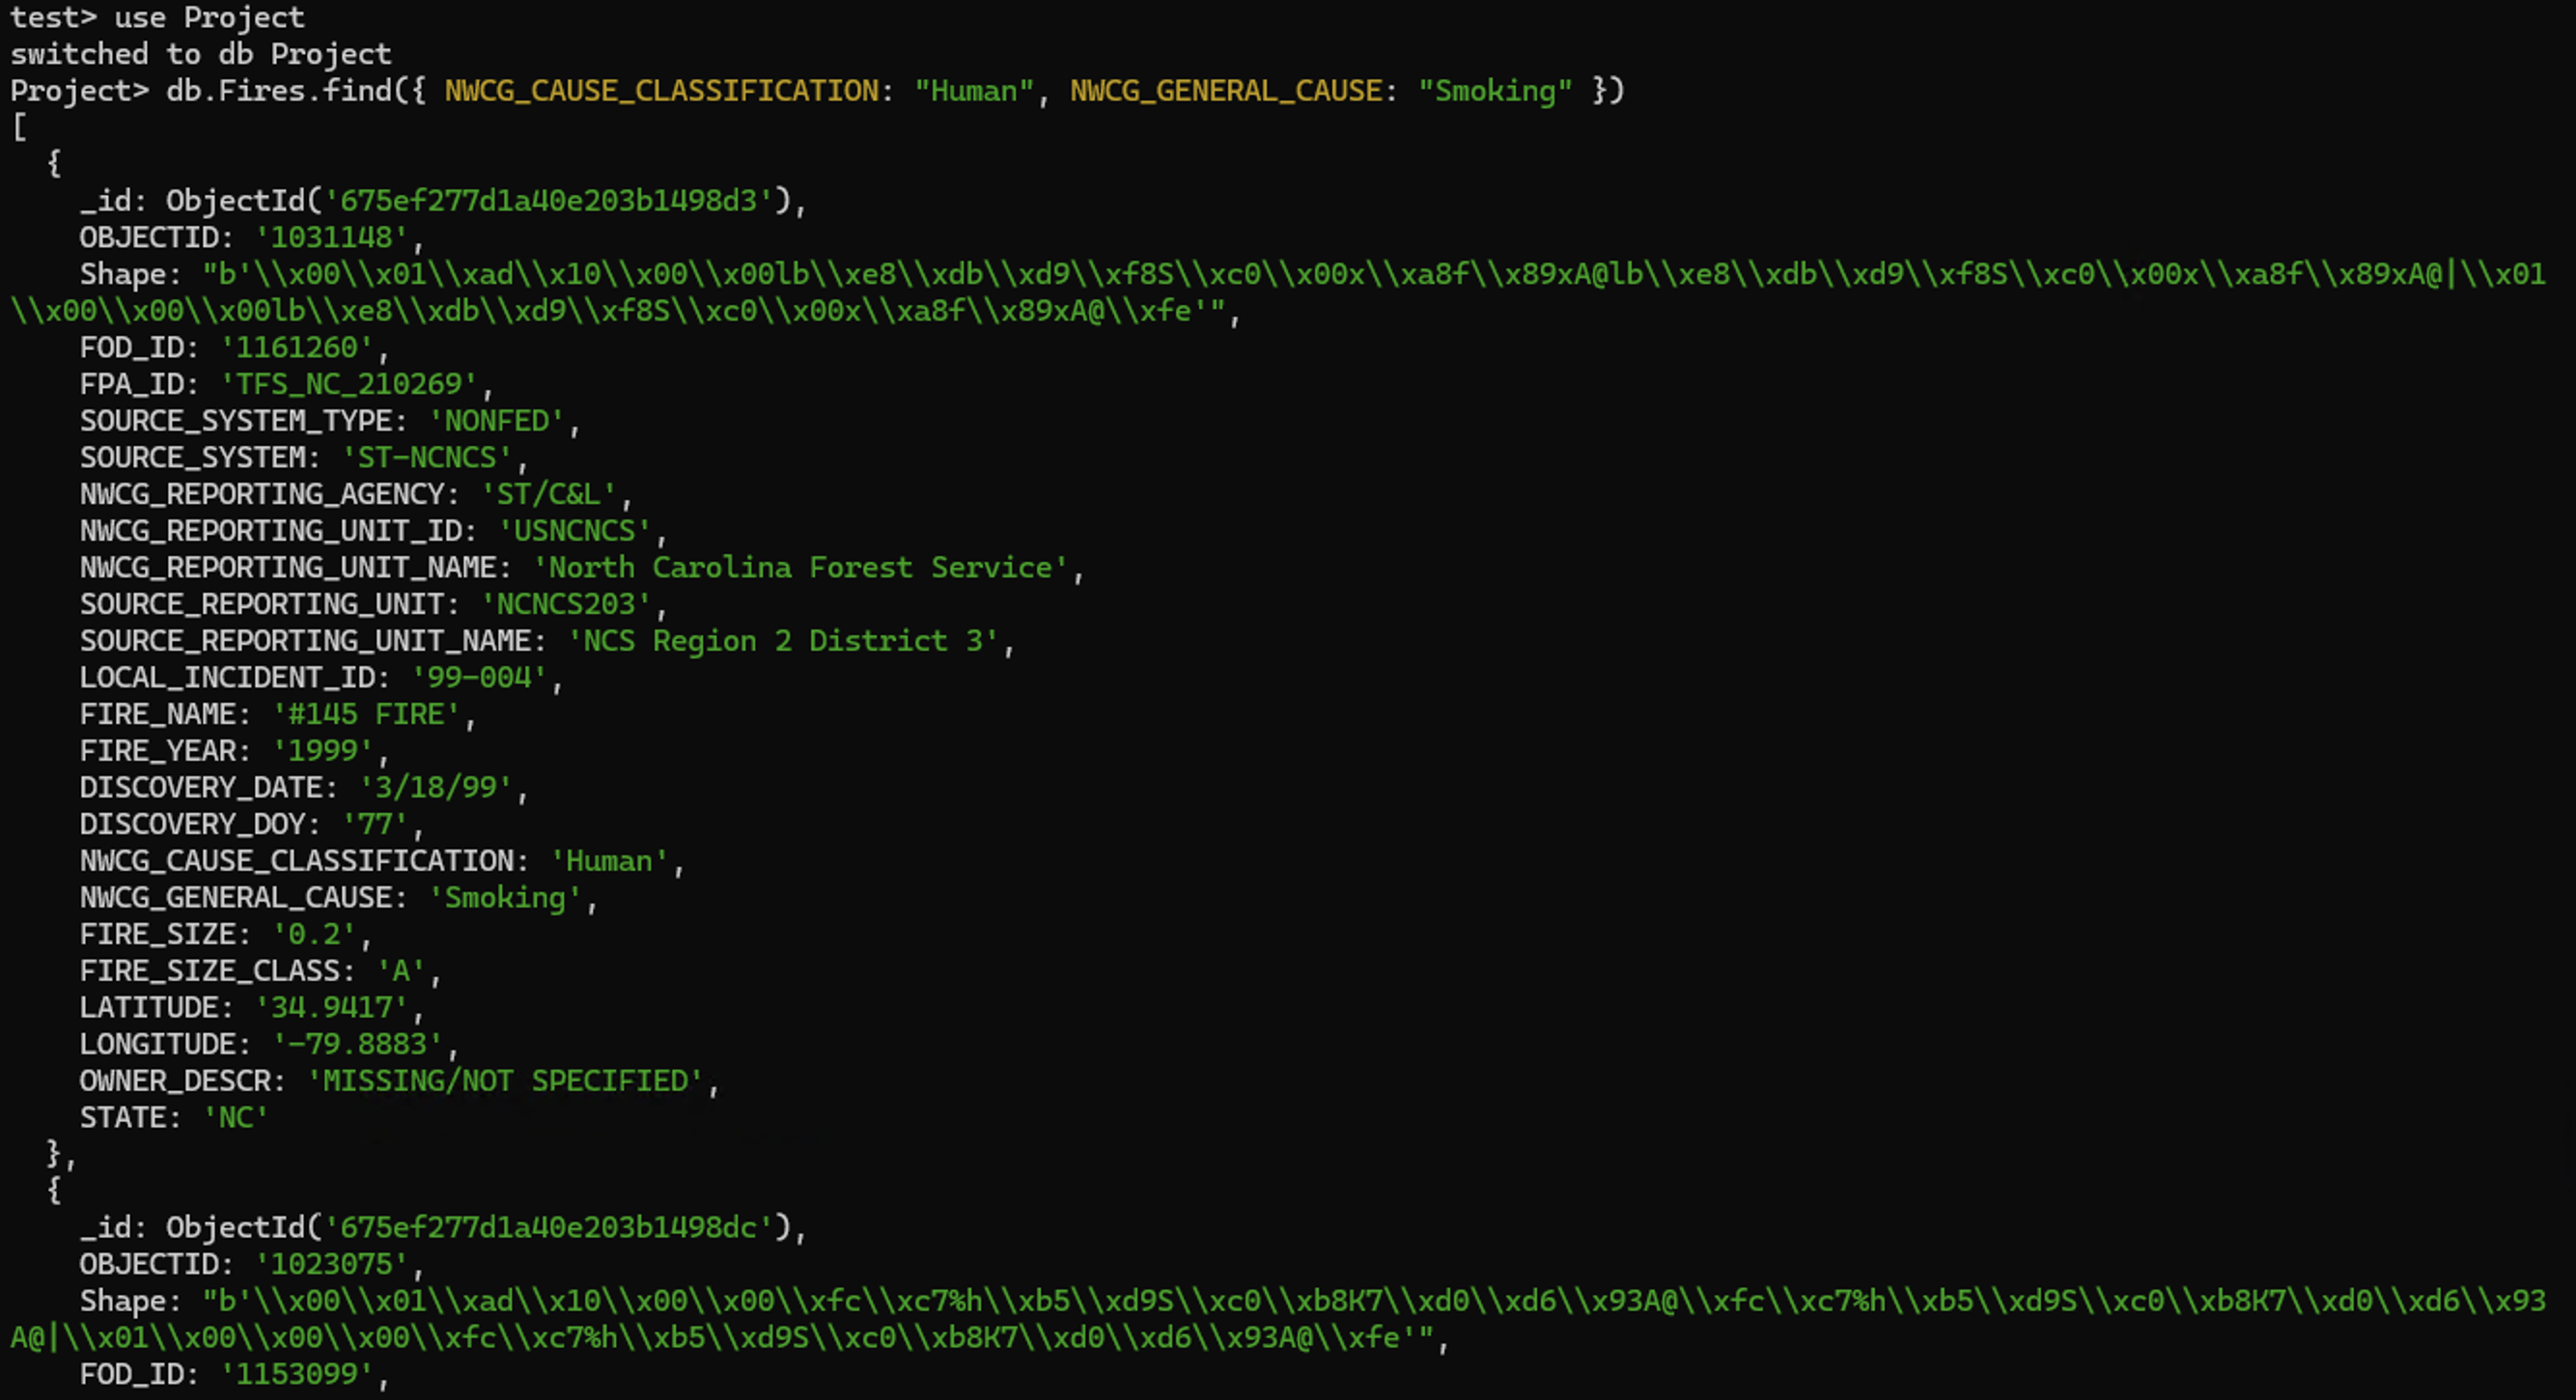

In [4]:
sparkdf = spark.read.format("mongo").option("database","Project").option("collection","Fires").load()
sparkdf.toPandas()

,COMPLEX_NAME,CONT_DATE,CONT_DOY,COUNTY,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,FIPS_CODE,FIPS_NAME,FIRE_NAME,...,NWCG_REPORTING_UNIT_NAME,OBJECTID,OWNER_DESCR,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,SOURCE_SYSTEM,SOURCE_SYSTEM_TYPE,STATE,Shape,_id
0,None,None,None,None,4/11/97,101,None,None,None,76,...,North Carolina Forest Service,1022509,MISSING/NOT SPECIFIED,NCNCS108,NCS Region 1 District 8,ST-NCNCS,NONFED,NC,b'\x00\x01\xad\x10\x00\x00 \xb8J\xdd\xd9\xb8S\...,"(675eeb36d1a40e203b13a099,)"
1,None,None,None,None,1/30/01,30,None,None,None,85,...,North Carolina Forest Service,1044146,MISSING/NOT SPECIFIED,NCNCS211,NCS Region 2 District 11,ST-NCNCS,NONFED,NC,b'\x00\x01\xad\x10\x00\x00\x88\xf3\x12\x91\x11...,"(675eeb36d1a40e203b13a09a,)"
2,None,None,None,None,None,None,None,None,None,None,...,None,1043983,None,None,None,None,None,None,b'\x00\x01\xad\x10\x00\x00\\x01\xd8\xc2D\x14T\...,"(675eeb36d1a40e203b13a09b,)"
3,None,None,None,None,12/8/01,342,None,None,None,98,...,North Carolina Forest Service,1044185,MISSING/NOT SPECIFIED,NCNCS211,NCS Region 2 District 11,ST-NCNCS,NONFED,NC,b'\x00\x01\xad\x10\x00\x00\x14<\xc4\xc0\xcc\xd...,"(675eeb36d1a40e203b13a09c,)"
4,None,None,None,None,2/26/96,57,None,None,None,129,...,North Carolina Forest Service,1020311,MISSING/NOT SPECIFIED,NCNCS301,NCS Region 3 District 1,ST-NCNCS,NONFED,NC,b'\x00\x01\xad\x10\x00\x00\xd0D\x93\x1c\xd4\x9...,"(675eeb36d1a40e203b13a09d,)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31752,None,None,None,None,4/7/98,97,None,None,None,ZOBLE PLANTATION,...,North Carolina Forest Service,1026339,MISSING/NOT SPECIFIED,NCNCS107,NCS Region 1 District 7,ST-NCNCS,NONFED,NC,b'\x00\x01\xad\x10\x00\x00\x08<yV\x07BS\xc0\xf...,"(675eeb3ad1a40e203b141ca1,)"
31753,None,None,None,None,10/24/98,297,None,None,None,ZOO FIRE,...,North Carolina Forest Service,1027584,MISSING/NOT SPECIFIED,NCNCS205,NCS Region 2 District 5,ST-NCNCS,NONFED,NC,b'\x00\x01\xad\x10\x00\x00\xd8\t\xa3\x17\xfd\x...,"(675eeb3ad1a40e203b141ca2,)"
31754,None,None,None,None,None,None,None,None,None,None,...,None,1026114,None,None,None,None,None,None,"b""""\x00x01xadx10x00x00x94xffxa9x1b\'Txc0xe8Wxe...","(675eeb3ad1a40e203b141ca3,)"
31755,None,None,None,None,2/8/01,39,None,None,None,ZSIGMAND FIRE,...,North Carolina Forest Service,1045026,MISSING/NOT SPECIFIED,NCNCS301,NCS Region 3 District 1,ST-NCNCS,NONFED,NC,b'\x00\x01\xad\x10\x00\x00\xf0m\xd6\xed\x87xT\...,"(675eeb3ad1a40e203b141ca4,)"


In [5]:
new_column_names = [column.lower() for column in sparkdf.columns]
fires = sparkdf.toDF(*new_column_names)
# Print the schema to verify that the first row is now used as column names
fires.printSchema()

root
 |-- complex_name: string (nullable = true)
 |-- cont_date: string (nullable = true)
 |-- cont_doy: string (nullable = true)
 |-- county: string (nullable = true)
 |-- discovery_date: string (nullable = true)
 |-- discovery_doy: string (nullable = true)
 |-- discovery_time: string (nullable = true)
 |-- fips_code: string (nullable = true)
 |-- fips_name: string (nullable = true)
 |-- fire_name: string (nullable = true)
 |-- fire_size: string (nullable = true)
 |-- fire_size_class: string (nullable = true)
 |-- fire_year: string (nullable = true)
 |-- fod_id: string (nullable = true)
 |-- fpa_id: string (nullable = true)
 |-- ics_209_plus_complex_join_id: string (nullable = true)
 |-- ics_209_plus_incident_join_id: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- local_fire_report_id: string (nullable = true)
 |-- local_incident_id: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- nwcg_cause_age_category: string (nullable = true)
 |-- nwcg

The code below is ensuring that there aren't any Null values in critical columns for execution of the code

In [10]:
fires = fires.dropna(subset=["FOD_ID"])
fires = fires.drop("_id")
fires = fires.dropna(subset=["STATE"])

In [11]:
# WE NEED A TABLE BEFORE WE CAN WRITE, Using Plain old Python
!pip install -q cassandra-driver
create_table_sql ='''
CREATE TABLE project.fires 
(
    objectid TEXT,
    shape TEXT,
    fod_id TEXT,
    fpa_id TEXT,
    source_system_type TEXT,
    source_system TEXT,
    NWCG_REPORTING_AGENCY TEXT,
    NWCG_REPORTING_UNIT_ID TEXT,
    NWCG_REPORTING_UNIT_NAME TEXT,
    SOURCE_REPORTING_UNIT TEXT,
    SOURCE_REPORTING_UNIT_NAME TEXT,
    LOCAL_FIRE_REPORT_ID TEXT,
    LOCAL_INCIDENT_ID TEXT,
    FIRE_CODE TEXT,
    FIRE_NAME TEXT,
    ICS_209_PLUS_INCIDENT_JOIN_ID TEXT,
    ICS_209_PLUS_COMPLEX_JOIN_ID TEXT,
    MTBS_ID TEXT,
    MTBS_FIRE_NAME TEXT,
    COMPLEX_NAME TEXT,
    FIRE_YEAR TEXT,
    DISCOVERY_DATE TEXT,
    DISCOVERY_DOY TEXT,
    DISCOVERY_TIME TEXT,
    NWCG_CAUSE_CLASSIFICATION TEXT,
    NWCG_GENERAL_CAUSE TEXT,
    NWCG_CAUSE_AGE_CATEGORY TEXT,
    CONT_DATE TEXT,
    CONT_DOY TEXT,
    CONT_TIME TEXT,
    FIRE_SIZE TEXT,
    FIRE_SIZE_CLASS TEXT,
    LATITUDE TEXT,
    LONGITUDE TEXT,
    OWNER_DESCR TEXT,
    STATE TEXT,
    COUNTY TEXT,
    FIPS_CODE TEXT,
    FIPS_NAME TEXT,
    primary key ((STATE, COUNTY), fod_id)
);

'''
from cassandra.cluster import Cluster
with Cluster([cassandra_host]) as cluster:
    session = cluster.connect()
    session.execute("DROP TABLE IF EXISTS project.fires")
    session.execute(create_table_sql)
print(create_table_sql)


CREATE TABLE project.fires 
(
    objectid TEXT,
    shape TEXT,
    fod_id TEXT,
    fpa_id TEXT,
    source_system_type TEXT,
    source_system TEXT,
    NWCG_REPORTING_AGENCY TEXT,
    NWCG_REPORTING_UNIT_ID TEXT,
    NWCG_REPORTING_UNIT_NAME TEXT,
    SOURCE_REPORTING_UNIT TEXT,
    SOURCE_REPORTING_UNIT_NAME TEXT,
    LOCAL_FIRE_REPORT_ID TEXT,
    LOCAL_INCIDENT_ID TEXT,
    FIRE_CODE TEXT,
    FIRE_NAME TEXT,
    ICS_209_PLUS_INCIDENT_JOIN_ID TEXT,
    ICS_209_PLUS_COMPLEX_JOIN_ID TEXT,
    MTBS_ID TEXT,
    MTBS_FIRE_NAME TEXT,
    COMPLEX_NAME TEXT,
    FIRE_YEAR TEXT,
    DISCOVERY_DATE TEXT,
    DISCOVERY_DOY TEXT,
    DISCOVERY_TIME TEXT,
    NWCG_CAUSE_CLASSIFICATION TEXT,
    NWCG_GENERAL_CAUSE TEXT,
    NWCG_CAUSE_AGE_CATEGORY TEXT,
    CONT_DATE TEXT,
    CONT_DOY TEXT,
    CONT_TIME TEXT,
    FIRE_SIZE TEXT,
    FIRE_SIZE_CLASS TEXT,
    LATITUDE TEXT,
    LONGITUDE TEXT,
    OWNER_DESCR TEXT,
    STATE TEXT,
    COUNTY TEXT,
    FIPS_CODE TEXT,
    FIPS_NAME TEXT,
  

The code below loads the data into cassandra and performs some analysis using the data from fires within the state of California, one of the states with the highest total number of fires.

In [12]:
from pyspark.sql.functions import to_date

# Assuming 'fires' DataFrame is already created and properly transformed
fires = fires.withColumn("discovery_date", to_date("discovery_date", "MM/dd/yyyy"))

In [13]:
# Write to Cassandra in append mode
fires.write.format("org.apache.spark.sql.cassandra") \
    .mode("Append") \
    .option("table", "fires") \
    .option("keyspace", "project") \
    .save()
print(f"project has {fires.count()} rows")

project has 29551 rows


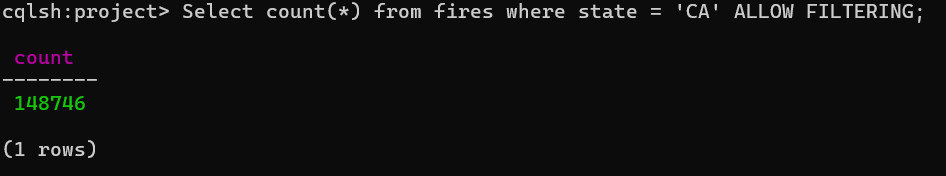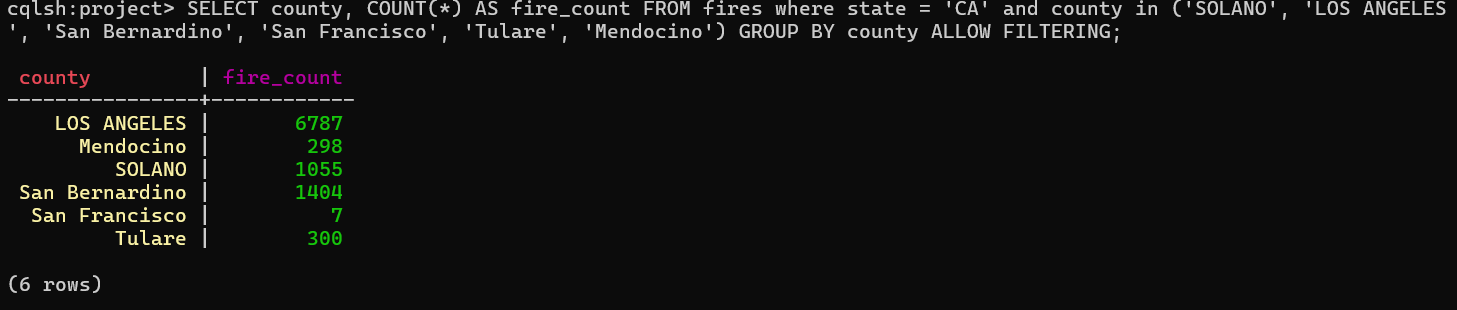

In [14]:
# read back from Cassandra
df1 =spark.read.format("org.apache.spark.sql.cassandra")\
    .options(table="fires", keyspace="project") \
    .load(df1.toPandas()

,state,fod_id,complex_name,cont_date,cont_doy,cont_time,county,discovery_date,discovery_doy,discovery_time,...,nwcg_reporting_agency,nwcg_reporting_unit_id,nwcg_reporting_unit_name,objectid,owner_descr,shape,source_reporting_unit,source_reporting_unit_name,source_system,source_system_type
0,-77.1833,"M\x0c\'\xbbKS\xc0\xc8\x1a\xce\xff""""bA@|\x01\x0...",None,Debris and open burning,None,None,MISSING/NOT SPECIFIED,None,2000,5/18/00,...,NONFED,ST-NCNCS,ST/C&L,1034369,34.7667,"""b'\x00\x01\xad\x10\x00\x00,M\x0c\'\xbbKS\xc0\...",USNCNCS,North Carolina Forest Service,TFS_NC_213553,1164540
1,FL,1082385,None,None,None,None,Palm Beach,6/11/94,162,None,...,ST/C&L,USFLFLS,Florida Forest Service,953825,MISSING/NOT SPECIFIED,b'\x00\x01\xad\x10\x00\x008 ~\x08\xae/T\xc0\x8...,FLFLS18,FLS Everglades District,ST-FLFLS,NONFED
2,FL,1082570,None,None,None,None,Palm Beach,7/6/94,187,None,...,ST/C&L,USFLFLS,Florida Forest Service,954006,MISSING/NOT SPECIFIED,b'\x00\x01\xad\x10\x00\x00\x90Z\xf3\xa6\x0c\x1...,FLFLS18,FLS Everglades District,ST-FLFLS,NONFED
3,FL,1084473,None,None,None,None,Volusia,6/19/98,170,None,...,ST/C&L,USFLFLS,Florida Forest Service,955882,MISSING/NOT SPECIFIED,b'\x00\x01\xad\x10\x00\x00\xcc\x91\xabD\xb8^T\...,FLFLS10,FLS Bunnell District,ST-FLFLS,NONFED
4,FL,1084548,None,None,None,None,Volusia,6/20/98,171,None,...,ST/C&L,USFLFLS,Florida Forest Service,955955,MISSING/NOT SPECIFIED,b'\x00\x01\xad\x10\x00\x00(\x95\xd9\xe8(LT\xc0...,FLFLS10,FLS Bunnell District,ST-FLFLS,NONFED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29543,OR,1080186,None,7/31/09,212,None,18,7/31/09,212,None,...,ST/C&L,USORGILN,Gilchrist Fire Department,951662,PRIVATE,b'\x00\x01\xad\x10\x00\x00\x04\xc8\x8b\xddBU^\...,ORODF-991,Gilchrist,ST-ORORS,NONFED
29544,35.225,"\x9f\xcf\xd1S\xc0\xc0\xb4\x9b\x92\xcc\x9cA@\x10""""",None,Human,Debris and open burning,None,-79.2783,None,None,1997,...,TFS_NC_202132,NONFED,ST-NCNCS,1023115,B,"b'\x00\x01\xad\x10\x00\x00\x10""",ST/C&L,USNCNCS,1153139,"\x9f\xcf\xd1S\xc0\xc0\xb4\x9b\x92\xcc\x9cA@\xfe'"""
29545,36.4917,"\xca\xef>B@\xc4\x9a$\xa5\xbf\xe0S\xc0h""""",None,Human,Debris and open burning,None,-79.5117,None,None,1999,...,TFS_NC_211516,NONFED,ST-NCNCS,1032392,A,b'\x00\x01\xad\x10\x00\x00\xc4\x9a$\xa5\xbf\xe...,ST/C&L,USNCNCS,1162507,"\xca\xef>B@\xfe'"""
29546,-80.2917,"]L)\xab\x12T\xc0h\xb5\xca\xfd""""2B@|\x01\x00\x0...",None,Natural,None,None,MISSING/NOT SPECIFIED,None,1997,7/16/97,...,NONFED,ST-NCNCS,ST/C&L,1024749,36.3917,"""b'\x00\x01\xad\x10\x00\x00,]L)\xab\x12T\xc0h\...",USNCNCS,North Carolina Forest Service,TFS_NC_203770,1154777


In [32]:
!pip install elasticsearch
import elasticsearch
from elasticsearch import Elasticsearch
import pandas as pd
from pyspark.sql.functions import col

# Connect to Elasticsearch
es = Elasticsearch(hosts=["http://elasticsearch:9200"])

# Read the CSV data with potential data type specification
#df = pd.read_csv(file_namev3, dtype={'DISCOVERY_DATE': str, 'LATITUDE': float, 'LONGITUDE': float, 'NWCG_CAUSE_CLASSIFICATION': str, 'FIRE_SIZE': float})

df = sparkdf \
    .withColumn("DISCOVERY_DATE", col("DISCOVERY_DATE").cast("string")) \
    .withColumn("LATITUDE", col("LATITUDE").cast("double")) \
    .withColumn("LONGITUDE", col("LONGITUDE").cast("double")) \
    .withColumn("NWCG_CAUSE_CLASSIFICATION", col("NWCG_CAUSE_CLASSIFICATION").cast("string")) \
    .withColumn("FIRE_SIZE", col("FIRE_SIZE").cast("double"))

# Select the desired fields
df_selected = df[['DISCOVERY_DATE', 'LATITUDE', 'LONGITUDE', 'NWCG_CAUSE_CLASSIFICATION', 'FIRE_SIZE']]

# Convert DataFrame to a list of dictionaries
data = [row.asDict() for row in df_selected.collect()]

# Define the Elasticsearch index
index_name = "firesv3"

# Bulk index the data (remove doc_type parameter)
for doc in data:
    es.index(index=index_name, body=doc)

print("done")

done


After the data frame is written to Elastic seach with the specified index and type, we are able to create a new index "firesv3". During this process, we also created a new geopoint, "latlong" , using the existing lat and long fields.

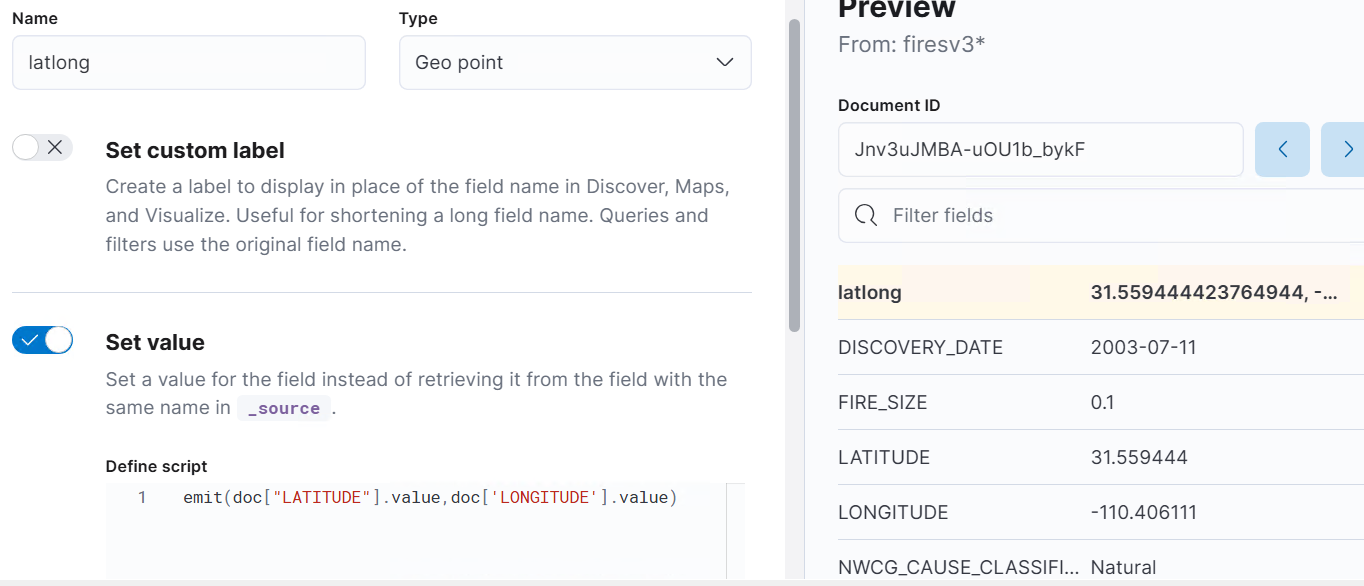

Using the newly created geo point, we can now visualize 1,000,000+ records of fires on the map. 

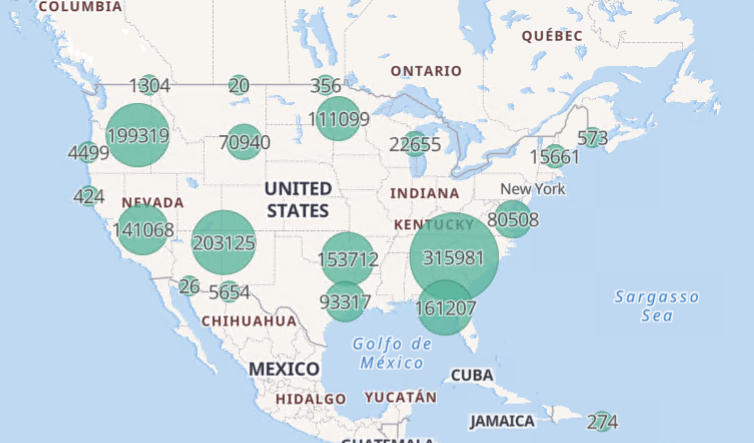

Additionally, using "DISCOVERY_DATE" as the key date field, we are able to visualize the frequency of fires from 1992 - 2010. 

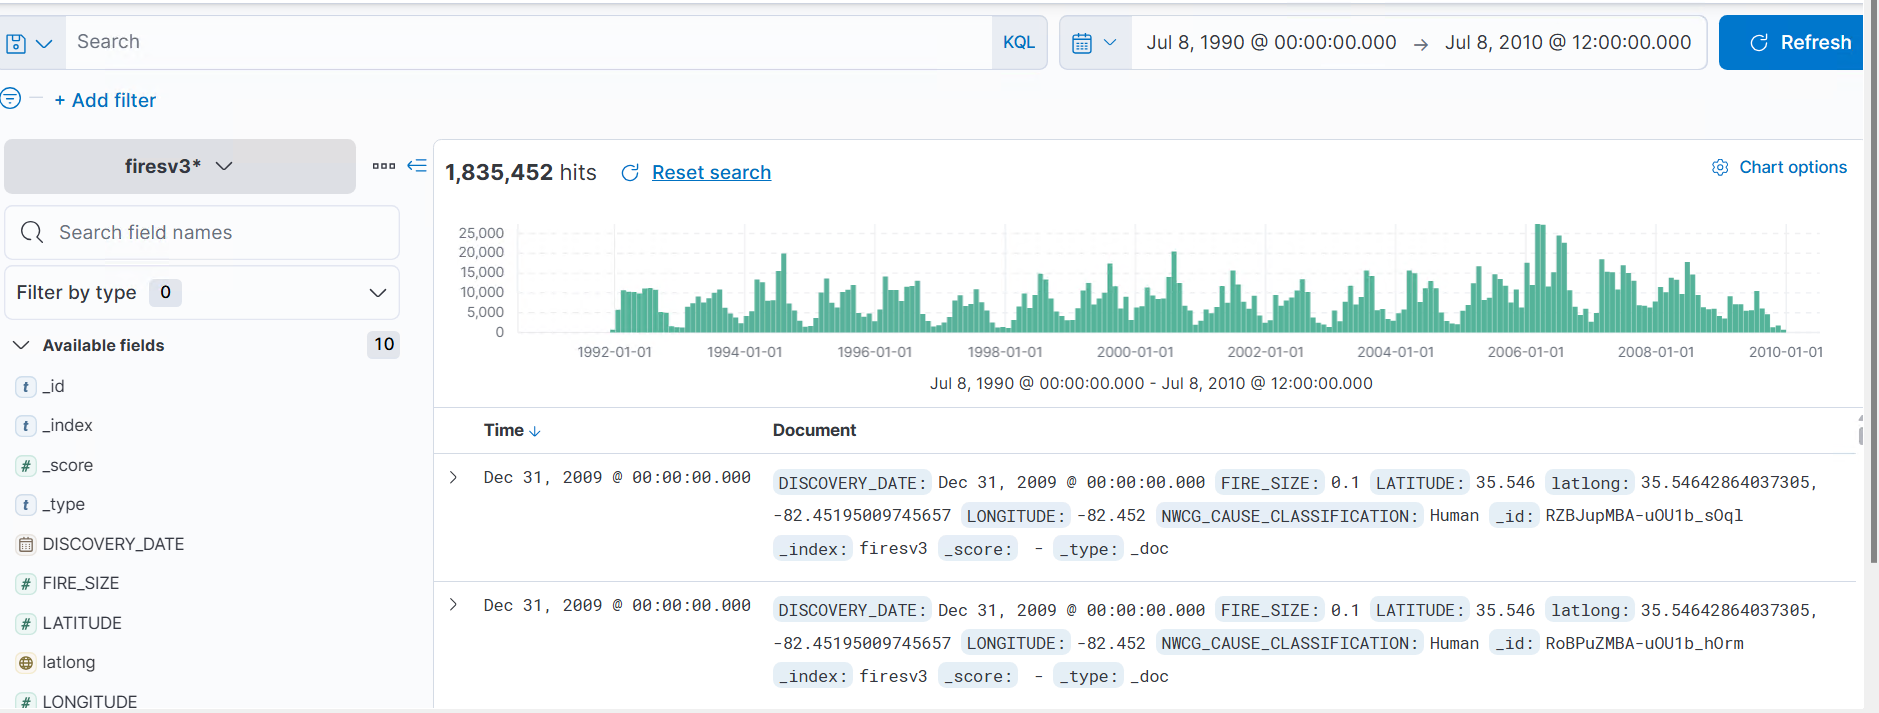